<a href="https://colab.research.google.com/github/KimYoungHyeop/PyTorch-/blob/main/Chapter_1_2022_01_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip3 install torch torchvision

In [20]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.5912, 0.5771, 0.2259],
        [0.3001, 0.3202, 0.1043],
        [0.2069, 0.6156, 0.0394],
        [0.2653, 0.9596, 0.9871],
        [0.7762, 0.5777, 0.1397]])


## TF 표현

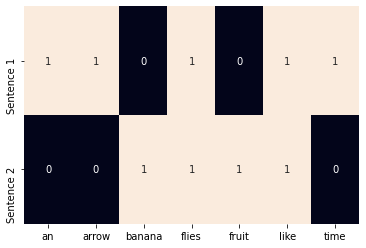

In [ ]:
#사이킷런을 사용하여 원-핫 벡터 또는 이진 표현 만들기

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow.', 
          'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

# plt.savefig('1-04.png', dpi=300)
plt.show()

## TF-IDF 표현

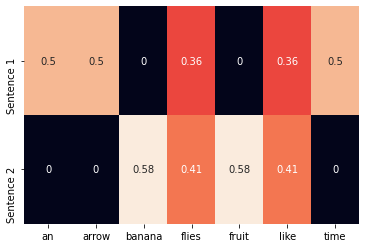

In [ ]:
#사이킷런을 사용해 TF-IDF 표현 만들기

from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
 
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= ['Sentence 1', 'Sentence 2'])

# plt.savefig('1-05.png', dpi=300)
plt.show()

$IDF(w) = \text{log} \left(\dfrac{N+1}{N_w+1}\right)+1$

첫 번째 문장의 'flies'와 'like'의 경우 TF = 1이므로 $\text{TF-IDF}=1\times\text{log}\left(\dfrac{2+1}{2+1}\right)+1=1$입니다.

단어 'an', 'arrow', 'time'의 경우 $N_w=1$입니다. 따라서 $\text{TF-IDF}=1\times\text{log}\left(\dfrac{2+1}{1+1}\right)+1=1.4054651081081644$입니다.

L2 정규화를 적용하면 'flies'와 'like'는 $\dfrac{1}{\sqrt{2\times1^2+3\times1.4054651081081644^2+}}=0.3552$가 됩니다.

'an', 'arrow', 'time'는 $\dfrac{1.4054651081081644}{\sqrt{2\times1^2+3\times1.4054651081081644^2+}}=0.4992$가 됩니다.

## 텐서

* 스칼라는 하나의 숫자입니다.
* 벡터는 숫자의 배열입니다.
* 행렬은 숫자의 2-D 배열입니다.
* 텐서는 숫자의 N-D 배열입니다.

#### 텐서 만들기

크기를 지정하여 텐서를 만들 수 있습니다. 여기서는 행이 5개이고 열이 3개인 텐서를 만듭니다.

In [ ]:
def describe(x):
    print("타입: {}".format(x.type()))
    print("크기: {}".format(x.shape))
    print("값: \n{}".format(x))

In [ ]:
#파이토치에서 torch.Tensor로 텐서 만들기

describe(torch.Tensor(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-1.2722e+08,  3.0663e-41,  3.7835e-44],
        [ 0.0000e+00,         nan,  3.0663e-41]])


In [ ]:
describe(torch.randn(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 0.0461,  0.4024, -1.0115],
        [ 0.2167, -0.6123,  0.5036]])


특정 크기의 랜덤한 텐서를 만드느 것이 일반적입니다.

In [ ]:
# 랜덤하게 초기화한 텐서 만들기

x = torch.rand(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.7749, 0.8208, 0.2793],
        [0.6817, 0.2837, 0.6567]])


1이나 0으로 채워진 텐서를 만들 수도 있습니다.

In [ ]:
#filled() 메서드 사용하기

describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)
x.fill_(5)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


텐서를 초기화한 후 값을 바꿀 수 있습니다.

노트: 밑줄 문자(`_`)로 끝나는 연산은 인-플레이스 연산입니다.

In [ ]:
x = torch.Tensor(3,4).fill_(5)
print(x.type())
print(x.shape)
print(x)

torch.FloatTensor
torch.Size([3, 4])
tensor([[5., 5., 5., 5.],
        [5., 5., 5., 5.],
        [5., 5., 5., 5.]])


리스트의 리스트로 텐서를 만들 수 있습니다.

In [ ]:
x = torch.Tensor([[1, 2,],  
                  [2, 4,]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 2.],
        [2., 4.]])


넘파이 배열로 텐서를 만들 수 있습니다.

In [ ]:
#넘파이로 텐서를 만들고 초기화하기

npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))
print(npy.dtype)

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.5603, 0.3505, 0.5762],
        [0.5849, 0.7525, 0.9362]], dtype=torch.float64)
float64


#### 텐서 타입

The FloatTensor has been the default tensor that we have been creating all 

---

along

In [ ]:
import torch
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
# 파이썬 리스트로 텐서를 만들고 초기화하기

x = torch.FloatTensor([[1, 2, 3],  
                       [4, 5, 6]])
describe(x)

x = x.long()
describe(x)

x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype=torch.int64)
describe(x)

x = x.float() 
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
x = torch.randn(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 1.5385, -0.9757,  1.5769],
        [ 0.3840, -0.6039, -0.5240]])


In [ ]:
describe(torch.add(x, x))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 3.0771, -1.9515,  3.1539],
        [ 0.7680, -1.2077, -1.0479]])


In [ ]:
describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 3.0771, -1.9515,  3.1539],
        [ 0.7680, -1.2077, -1.0479]])


In [ ]:
x = torch.arange(6)
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: 
tensor([0, 1, 2, 3, 4, 5])


In [ ]:
x = x.view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
describe(torch.sum(x, dim=0))
describe(torch.sum(x, dim=1))

타입: torch.LongTensor
크기: torch.Size([3])
값: 
tensor([3, 5, 7])
타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([ 3, 12])


In [ ]:
describe(torch.transpose(x, 0, 1))

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [ ]:
import torch
x = torch.arange(6).view(2, 3)
describe(x)
describe(x[:1, :2])
describe(x[0, 1])

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([1, 2])
값: 
tensor([[0, 1]])
타입: torch.LongTensor
크기: torch.Size([])
값: 
1


In [ ]:
indices = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 2],
        [3, 5]])


In [ ]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [ ]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])

타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])


인덱싱 연산에는 넘파이 `int64` 타입에 해당하는 LongTensor가 사용됩니다.

In [ ]:
#텐서 속성

x = torch.LongTensor([[1, 2, 3],  
                      [4, 5, 6],
                      [7, 8, 9]])
describe(x)
print(x.dtype)
print(x.numpy().dtype)

타입: torch.LongTensor
크기: torch.Size([3, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.int64
int64


FloatTensor를 LongTensor로 바꿀 수 있습니다.

In [ ]:
x = torch.FloatTensor([[1, 2, 3],  
                       [4, 5, 6],
                       [7, 8, 9]])
x = x.long()
describe(x)

타입: torch.LongTensor
크기: torch.Size([3, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


숫자가 증가되는 벡터를 만들 수 있습니다.

In [ ]:
x = torch.arange(0, 10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


이따금 인덱싱을 위해 정수 기반의 배열이 필요합니다.

In [ ]:
x = torch.arange(0, 10).long()
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
